# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(37741, 37741)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-04-21 09:39:05,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,9
1,2020-04-21 09:39:09,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,0
2,2020-04-21 10:41:42,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,9
3,2020-04-21 10:47:58,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-2
4,2020-04-21 12:16:51,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,9
...,...,...,...,...,...,...
56,2020-04-21 21:04:53,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,52
57,2020-04-21 21:10:19,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-45
58,2020-04-21 21:12:26,ExchangeId.LIQUID,ExchangeId.COINCHECK,BTC/JPY,0.009,49
59,2020-04-21 21:22:17,ExchangeId.COINCHECK,ExchangeId.LIQUID,BTC/JPY,0.009,-46


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-04-21 09:39:05,買い,ExchangeId.LIQUID,746225
1,2020-04-21 09:39:05,売り,ExchangeId.COINCHECK,747245
2,2020-04-21 09:39:09,買い,ExchangeId.COINCHECK,747295
3,2020-04-21 09:39:09,売り,ExchangeId.LIQUID,747242
4,2020-04-21 10:41:42,買い,ExchangeId.LIQUID,744109
...,...,...,...,...
117,2020-04-21 21:12:26,売り,ExchangeId.COINCHECK,742500
118,2020-04-21 21:22:17,買い,ExchangeId.COINCHECK,742520
119,2020-04-21 21:22:17,売り,ExchangeId.LIQUID,737329
120,2020-04-21 21:28:16,買い,ExchangeId.LIQUID,738275


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                37741
           取引回数                   61
           開始日時  2020-04-21 09:31:45
           終了日時  2020-04-21 21:59:15
        取引時間[H]      0 days 12:27:30
      取引単位[BTC]                0.009
  利確しきい値[JPY]                 6042
損切りマージン[JPY]                  800
-------------------  -------------------

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   10053 |
+-------------+---------+
| 利益[JPY]   |      53 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]   |   0.022 |
+-------------+---------+
| 利益[BTC]   |       0 |
+-------------+---------+
| 開始[TOTAL] | 26272.5 |
+-------------+---------+
| 終了[TOTAL] | 26254.2 |
+-------------+---------+
| 利益[TOTAL] | -18.279 |
+-------------+---------+


## グラフ出力

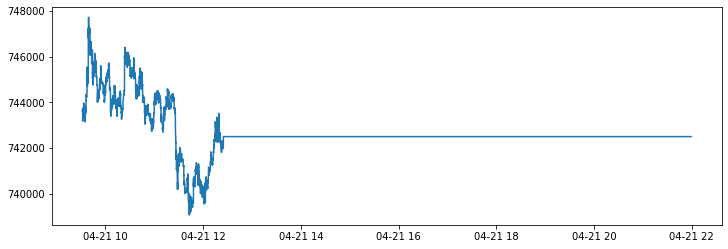

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

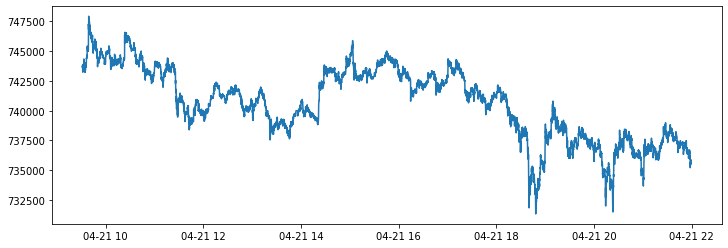

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_lq.index, df_lq['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_cc.index),
    "buy_coincheck_sell_liquid": df_lq.reset_index().bid - df_cc.reset_index().ask,
    "buy_liquid_sell_coincheck": df_cc.reset_index().bid - df_lq.reset_index().ask,
    'coincheck_bid': df_cc.reset_index().bid,
     'liquid_ask': df_lq.reset_index().ask,
    'liquid_bid': df_lq.reset_index().bid,
    'coincheck_ask': df_cc.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-04-21 09:30:00,-277,-190,744346,744536,744449,744726
2020-04-21 09:40:00,-372,-52,745793,745845,745767,746140
2020-04-21 09:50:00,-314,-2,744579,744580,744480,744794
2020-04-21 10:00:00,-407,49,744617,744568,744504,744910
2020-04-21 10:10:00,-134,-172,744026,744198,744129,744262
...,...,...,...,...,...,...
2020-04-21 21:10:00,-5957,5826,742500,736674,736563,742520
2020-04-21 21:20:00,-4892,4772,742500,737728,737628,742520
2020-04-21 21:30:00,-4532,4438,742500,738062,737988,742520
